In [36]:
import joblib
import torch
import torch.nn as nn
from power_toys.ml_model.fc_net import FC_Net
import numpy as np


model = FC_Net(output_size=1,
               hidden_size=500,
               model_path='./power_toys/data/trained_model/transformer/coreloss.pth',
               scaler_x_path='./power_toys/data/scaler/transformer/coreloss_x_scaler.pkl',
               scaler_y_path='./power_toys/data/scaler/transformer/coreloss_y_scaler.pkl')

input_new = np.array([[2,10,7]])

outputs = model.predict(input_new)

print(outputs)

[[50.626965]]


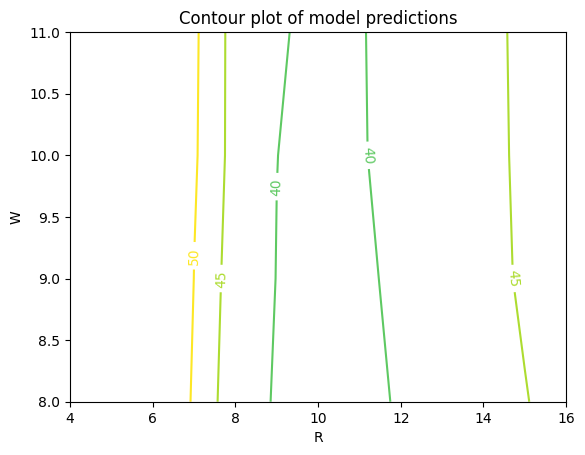

In [43]:
import matplotlib.pyplot as plt
r = np.arange(4,17,1)
w = np.arange(8,12,1)

[W,R] = np.meshgrid(w,r)
K = np.full(R.shape, 2)
R_r = R.ravel()
W_r = W.ravel()
K_r = K.ravel()
inputs = np.vstack((K_r, W_r, R_r)).T
predictions = model.predict(inputs)

# 将 predictions 变回与 R 和 W 相同的形状
predictions = predictions.reshape(R.shape)

# 创建等高线图
c = plt.contour(R, W, predictions,levels=np.arange(10,55,5))
plt.clabel(c, inline=1, fontsize=10)
plt.xlabel('R')
plt.ylabel('W')
plt.title('Contour plot of model predictions')
plt.show()

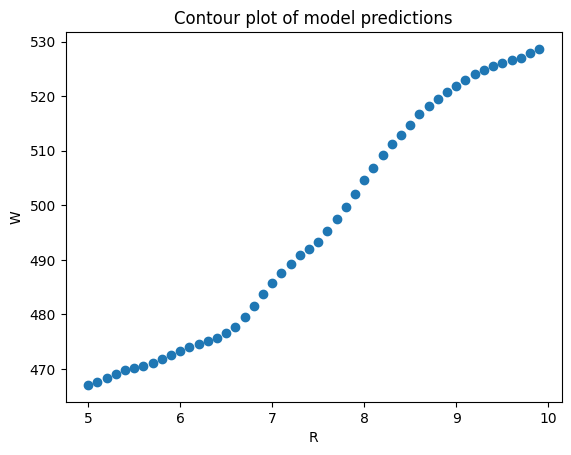

In [34]:
import matplotlib.pyplot as plt
r = np.arange(5,10,0.1)
w = np.full(r.shape,10)
k = np.full(r.shape,2)

inputs = np.vstack((w, r, k)).T
predictions = model.predict(inputs)

# 将 predictions 变回与 R 和 W 相同的形状
predictions = predictions.reshape(r.shape)

# 创建等高线图
plt.scatter(r, predictions)
plt.xlabel('R')
plt.ylabel('W')
plt.title('Contour plot of model predictions')
plt.show()

<a list of 5 text.Text objects>

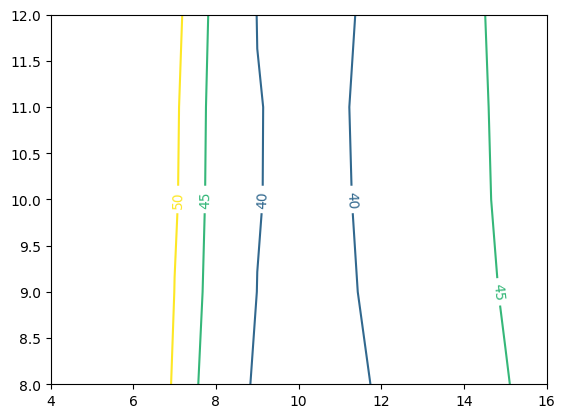

In [41]:
data = np.loadtxt('./power_toys/data/FEA data/vo100/Coreloss_500kHz_k2_Vo100.csv',skiprows=1,delimiter=',')
R = data[:,3]
W = data[:,2]
loss = data[:,4]

R = R.reshape([5,13])
W = W.reshape([5,13])
loss = loss.reshape([5,13])
c = plt.contour(R,W,loss,levels=[35,36,37,38,40,45,50])
plt.clabel(c, inline=1, fontsize=10)

In [1]:
from power_toys.components.tranformer import Transformer

trans = Transformer(6e-3,10e-3,2)
trans.create_model()

PyAEDT INFO: StdOut has been enabled
PyAEDT INFO: using existing logger.
PyAEDT INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.
PyAEDT INFO: AEDT installation Path D:\Program Files\Ansys22\v221\Win64.
PyAEDT INFO: Launching AEDT with module PythonNET.
PyAEDT INFO: AEDT 2022.1 Started with process ID 23172.
PyAEDT INFO: pyaedt v0.6.81
PyAEDT INFO: Python version 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
PyAEDT INFO: AEDT 2022.1.0 Build Date 2021-11-22 22:18:25
PyAEDT INFO: Project Project_VTP has been created.
PyAEDT INFO: Added design 'Transformer' of type Maxwell 3D.
PyAEDT INFO: Aedt Objects initialized
PyAEDT INFO: Variable Manager initialized
PyAEDT INFO: Design Loaded
PyAEDT INFO: Materials Loaded
PyAEDT INFO: aedt file load time 0.0039920806884765625
PyAEDT INFO: Successfully loaded project materials !
PyAEDT INFO: Union of 3 objects has been executed.
PyAEDT INFO: Union of 3 objects has been executed.
PyAEDT INFO: Union of 3

In [2]:
trans.assign_current(2)

In [3]:
trans.start_sim()

In [7]:
from power_toys.components.ansys import Ansys
solutions = trans.m3d.post.get_solution_data(
    expressions = 'loss_tmp',
    report_category="Fields"
)
print(solutions.data_magnitude())

PyAEDT INFO: Solution Data Correctly Loaded.
[0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.041063344045842186, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.041063344045842186, 0.04106334404584218, 0.041063344045842186, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.04106334404584218, 0.0410

In [ ]:
from power_toys.components.tranformer import Transformer

trans = Transformer(6e-3,10e-3,2)
trans.create_model()
trans.assign_current(2)

In [ ]:
from power_toys.components.ansys import Ansys
trans.start_sim()
solutions = trans.m3d.post.get_solution_data(
    expressions = 'loss_tmp',
    report_category="Fields"
)
print(solutions.data_magnitude())

In [2]:
from power_toys.components.ansys import  Ansys

ansys = Ansys()
ansys.connect_to_proj('Project2', 'Maxwell3DDesign1')

PyAEDT INFO: StdOut has been enabled
PyAEDT INFO: using existing logger.
PyAEDT INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.
PyAEDT INFO: AEDT installation Path D:\Program Files\Ansys22\v221\Win64.
PyAEDT INFO: Launching AEDT with module PythonNET.
PyAEDT INFO: AEDT 2022.1 Started with process ID 11384.
PyAEDT INFO: pyaedt v0.6.81
PyAEDT INFO: Python version 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
PyAEDT INFO: AEDT 2022.1.0 Build Date 2021-11-22 22:18:25
PyAEDT INFO: Project Project2 set to active.
PyAEDT INFO: Aedt Objects initialized
PyAEDT INFO: Variable Manager initialized
PyAEDT INFO: Design Loaded
PyAEDT INFO: Materials Loaded
PyAEDT INFO: aedt file load time 0.0039904117584228516


In [3]:
Ansys.create_strip_face(ansys.m3d)

PyAEDT ERROR: Method arguments: 
PyAEDT ERROR:     cs_plane = [0, 0, 0] 
PyAEDT ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/version/stable/search.html?q=create_circle+cs_plane+position+radius+numSides+is_covered+name+matname+non_model
PyAEDT ERROR: Method arguments: 
PyAEDT ERROR:     cs_plane = [0, 0, 0] 
PyAEDT ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/version/stable/search.html?q=create_circle+cs_plane+position+radius+numSides+is_covered+name+matname+non_model
PyAEDT ERROR: Method arguments: 
PyAEDT ERROR:     csPlane = [0, 0, 0] 
PyAEDT ERROR:     dimension_list = [0, 0] 
PyAEDT ERROR: Check Online documentation on: https://aedt.docs.pyansys.com/version/stable/search.html?q=create_rectangle+csPlane+position+dimension_list+name+matname+is_covered
